## UK CENSUS DATA

#### Project Background Information.
Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of such a census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding. 

In the project, you will be provided with a mock census of an imaginary modest town. I would be considering myself to be part of a local government team who will be making decisions on what to do with an unoccupied plot of land and what to invest in. The task is to clean this dataset. As you will rapidly discover, there are missing entries, and, candidly, some responses from the population are outright lies. 

#### Context.
This assignment is intended to stretch your data science skills and develop your programming through the use of a mock census. Some of the contact time on Fridays will be spent on this project to help plan, think about, and ultimately execute the assignment, but further personal study time will be essential to dedicate to this as well. 

+ About this Mock Census.
The mock census contains randomly generate data using the Faker package in Python. It has been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the UK wherein only a few questions were asked of the population. The fields recorded are as follows:
  + (1)	Street Number (this is set to “1” if it is a unique dwelling);
  + (2)	Street Name;
  + (3)	First Name of occupant;
  + (4)	Surname of occupant;
  + (5)	Age of occupant;
  + (6)	Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply the person who had the responsibility to fill in the census details);
 + (7)	Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors);
 + (8)	Gender (one of: Male, Female; note that other responses were not implemented in 1881);
 + (9)	Occupation (this field was implemented in a modern style, rather than typical 1881 occupations);
 + (10) Infirmity (we have implemented a limited set of infirmities following the style of 1881);
 + (11) Religion (we have implemented a set of real-world religions). 


#### The Task.
The town from the census is a modestly sized one sandwiched between two much larger cities that it is connected to by motorways. The town does not have a university, but students do live in the town and commute to the nearby cities. Once you have a cleaned dataset to analyse, your task is to decide the following:

+ (a) What should be built on an unoccupied plot of land that the local government wishes to develop?  Your choices are: 
	(i) High-density housing. This should be built if the population is significantly expanding.
	(ii) Low-density housing. This should be built if the population is “affluent” and there is demand for large family housing.
	(iii) Train station. There are potentially a lot of commuters in the town and building a train station could take pressure off the roads. But how will you identify commuters?
	(iv) Religious building. There is already one place of worship for Catholics in the town. Is there demand for a second Church (if so, which denomination?), or for a different religious building?
	(v) Emergency medical building. Not a full hospital, but a minor injuries centre. This should be built if there are many injuries or future pregnancies likely in the population. 
	(vi) Something else? 
Whichever you choose, you must justify it from the data provided to you and argue it is a priority against other choices. 
+ (b) Which one of the following options should be invested in?
	(i) Employment and training. If there is evidence for a lot of unemployment, we should re-train people for new skills. 
	(ii) Old age care. If there is evidence for increasing numbers of retired people in future years, the town will need to allocate more funding for end of life care. 
	(iii) Increase spending for schooling. If there is evidence of a growing population of school-aged children (new births, or families moving in to the town), then schooling spend should increase. 
	(iv) General infrastructure. If the town is expanding, then services (waste collection; road maintenance, etc.) will require more investment. 

---

Import needed Libraries

In [1]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('census_08_new.csv')

In [3]:
df.info() # This tells us the features and variable types available in my dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10174 entries, 0 to 10173
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10172 non-null  object
 1   Street                         10174 non-null  object
 2   First Name                     10172 non-null  object
 3   Surname                        10174 non-null  object
 4   Age                            10174 non-null  object
 5   Relationship to Head of House  10174 non-null  object
 6   Marital Status                 7756 non-null   object
 7   Gender                         10174 non-null  object
 8   Occupation                     10174 non-null  object
 9   Infirmity                      10174 non-null  object
 10  Religion                       7705 non-null   object
dtypes: object(11)
memory usage: 874.5+ KB


In [4]:
df.isnull().sum() # trying to view the missing values in our variables

House Number                        2
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2418
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2469
dtype: int64

## Data Cleaning 

Each column will be treated as an independent variable, missing and incorrect data will be eliminated or replaced, based on inference from the data. 
+ Unique method will be extensively for all the colums used to obtain distinct elements in the columns
+ Replace method is a string method used to find a specific value and replace it. 

#### Age Column

In [5]:
df['Age'].unique() 

array(['72', '23', '25', '44', '47', '9', '40', '57', '29', '52', '37',
       '38', '4', '3', '68', '71', '39', '6', '45', '31', '35', '30',
       '50', '53', '10', '66', '32', '16', '22', '24', '51', '13', '12',
       '18', '21', '19', '62', '65', '26', '1', '46', '56', '58', '34',
       '54', '61', '36', '33', '48', '42', '49', '17', '15', '14', '8',
       '20', '64', '60', '27', '0', '59', '2', '43', '7', '11', '5', '69',
       '41', '28', '78', '76', '75', '63', '77', '79', '73', '84', '83',
       '101', '67', '80', '70', '81', '95', 'Three', 'One', 'Eight', '55',
       '74', '87', '89', '91', '82', '93', '100', '57.15935784',
       '58.15935784', '88', '90', '96', '86', '400', '99', '94', '103',
       ' ', '85', '104', '105', '102', '92', '81.98805985', '84.98805985',
       '98', '109', '2.2', '97', '69.83970697', '72.05604773',
       '74.05604773', '0.5', '-1', '4.5'], dtype=object)

In [6]:
df[df["Age"] == ' '] #outlier age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2908,18,Lavendar Lane,Nicola,Kirby,,Head,Single,Female,Unemployed,None,None


In [7]:
df.loc[[2907,2908,2909,2910]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2907,17,Lavendar Lane,Kirsty,Todd,27,None,Single,Female,Quarry manager,None,Christian
2908,18,Lavendar Lane,Nicola,Kirby,,Head,Single,Female,Unemployed,None,None
2909,19,Lavendar Lane,Glenn,Bishop,42,Head,Single,Male,Horticultural therapist,None,Catholic
2910,19,Lavendar Lane,Paula,Elliott,34,Partner,Single,Female,"Solicitor, Scotland",None,Catholic


In [8]:
df[df["Age"] == '-1'] #outlier age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10164,1,Walters Haven,Stewart,Jones,-1,Grandson,NaN,Male,Child,None,NaN


In [9]:
df.loc[[5710,10168]] #outlier age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5710,138,Guinevere Plains,Gordon,Browne,2.2,Partner,Single,Male,University Student,None,Christian
10168,1,Butler Rocks,J,Wilson,4.5,Husband,Married,MALE,Purchasing manager,None,None


In [10]:
df.loc[10164, ["Age"]] = '0'
df.loc[5710, ["Age"]] = '22'
df.loc[10168, ["Age"]] = '45'

A University student cannot be aged 2.2 so it is replaced to 22 so also the purchasing manager. The grandson will be assumed to be of age 0.

---
The values One, Three, Eight will be replaced with their digits appropriately. From the data a head of the home can only be someone aged 18 so entry 2908 will be replaced to 18

In [11]:
age_values = {'One': '1',
             'Three': '3',
             'Eight': '8',
             ' ': '18'}

In [12]:
df['Age'] = df['Age'].replace(age_values)

In [13]:
df['Age'].unique()

array(['72', '23', '25', '44', '47', '9', '40', '57', '29', '52', '37',
       '38', '4', '3', '68', '71', '39', '6', '45', '31', '35', '30',
       '50', '53', '10', '66', '32', '16', '22', '24', '51', '13', '12',
       '18', '21', '19', '62', '65', '26', '1', '46', '56', '58', '34',
       '54', '61', '36', '33', '48', '42', '49', '17', '15', '14', '8',
       '20', '64', '60', '27', '0', '59', '2', '43', '7', '11', '5', '69',
       '41', '28', '78', '76', '75', '63', '77', '79', '73', '84', '83',
       '101', '67', '80', '70', '81', '95', '55', '74', '87', '89', '91',
       '82', '93', '100', '57.15935784', '58.15935784', '88', '90', '96',
       '86', '400', '99', '94', '103', '85', '104', '105', '102', '92',
       '81.98805985', '84.98805985', '98', '109', '97', '69.83970697',
       '72.05604773', '74.05604773', '0.5'], dtype=object)

In [14]:
df['Age'] = df['Age'].astype(float).astype(int)#convert type to float then to int(Age is meant to be an integer)

In [15]:
df[df["Age"] == 400] #Outlier age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2231,67,Falcon Lane,Marc,Connolly,400,Husband,Married,Male,Press sub,None,None


In [16]:
df.loc[[2230,2232,2233]] #After infering we realize the mistake.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2230,67,Falcon Lane,Alexandra,Connolly,34,Head,Married,Female,"Therapist, drama",None,None
2232,68,Falcon Lane,Beth,Carter,61,Head,Single,Female,Music tutor,None,Christian
2233,68,Falcon Lane,Debra,Carter,23,Daughter,Single,Female,Police officer,None,Christian


In [17]:
df.loc[2231, ["Age"]] = 40

In [18]:
df["Age"].unique()

array([ 72,  23,  25,  44,  47,   9,  40,  57,  29,  52,  37,  38,   4,
         3,  68,  71,  39,   6,  45,  31,  35,  30,  50,  53,  10,  66,
        32,  16,  22,  24,  51,  13,  12,  18,  21,  19,  62,  65,  26,
         1,  46,  56,  58,  34,  54,  61,  36,  33,  48,  42,  49,  17,
        15,  14,   8,  20,  64,  60,  27,   0,  59,   2,  43,   7,  11,
         5,  69,  41,  28,  78,  76,  75,  63,  77,  79,  73,  84,  83,
       101,  67,  80,  70,  81,  95,  55,  74,  87,  89,  91,  82,  93,
       100,  88,  90,  96,  86,  99,  94, 103,  85, 104, 105, 102,  92,
        98, 109,  97])

##### House Number

In [19]:
df["House Number"].unique() #This column is also meant to be an Integer 

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', ' ',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101',
       '102', '103', '104', '105', '106', '107', '108', '109', '110',
       '111', '112', '113', '114', '115', '116', '117', '118', '119',
       '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130', '131', '132', '133', '134', '135', '136', '137',
       '138', '139', '140', '141', '142', '143', '144', '14

In [20]:
#Replacing all the data in incorrect formats
house_values = {'ONE': '1',
             'TEN': '10',
             ' ' : "None",
             np.nan : "None"}
df['House Number'] = df['House Number'].replace(house_values)

In [21]:
df[df["House Number"] == "None"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
68,None,Woodward Street,Pauline,Jones,56,Head,Single,Female,"Therapist, drama",None,Christian
3183,None,Smith Crossroad,Matthew,Bryant,80,Head,Widowed,Male,Retired Educational psychologist,None,Christian
8165,None,Shah Freeway,Gerald,Rogers,11,Son,NaN,Male,Student,None,NaN


In [22]:
df.loc[[66,67,68,69,3181,3182,3183,3184,8163,8164,8165,8166,8167,8168]] #Locates the row by index number so we can filter through

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
66,12,Woodward Street,Reece,Read,13,Son,NaN,Male,Student,None,NaN
67,12,Woodward Street,Gerard,Read,12,Son,NaN,Male,Student,None,NaN
68,None,Woodward Street,Pauline,Jones,56,Head,Single,Female,"Therapist, drama",None,Christian
69,14,Woodward Street,Gemma,Young,48,Head,Married,Female,Special educational needs teacher,None,Christian
3181,12,Smith Crossroad,Fiona,Harris,41,Daughter,Single,Female,Management consultant,None,None
3182,12,Smith Crossroad,Jake,Harris,41,Son,Single,Male,"Engineer, agricultural",None,None
3183,None,Smith Crossroad,Matthew,Bryant,80,Head,Widowed,Male,Retired Educational psychologist,None,Christian
3184,14,Smith Crossroad,Patricia,Atkinson,61,Head,Single,Female,Occupational therapist,None,None
8163,107,Shah Freeway,Donald,Gardner,56,Partner,Single,Male,Animator,None,None
8164,107,Shah Freeway,Aaron,Walker,15,Son,NaN,Male,Student,None,NaN


In [23]:
df.loc[8165, ["House Number"]] = "107" # entry has no affiliation with any House number or family so its interpolated

In [24]:
df.loc[3183, ["House Number"]] = "13"

In [25]:
df.loc[68, ["House Number"]] = "13" #changing a entry by its column name and index number after infering from data

In [26]:
df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [27]:
df["House Number"] = df["House Number"].astype(int) #convert column to integer

In [28]:
df["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

##### Street

In [29]:
df["Street"].unique()

array(['Pendragon Street', 'Woodward Street', 'Stoke Avenue',
       'Bangor Street', ' ', 'Zebraban Drive', 'Peel Light',
       'Khan Terrace', 'Davies Trace', 'Newton Locks',
       'Threadneedle Drive', 'McLean Shoals', 'Falcon Lane',
       'Yates Drive', 'Fish Locks', 'Green Street', 'Riley Avenue',
       'Taurusplace Drive', 'Lavendar Lane', 'Cole Fort', 'January Roads',
       'Leisure Road', 'Smith Crossroad', 'Green Lodge', 'Williams Ports',
       'Bassenthwaite Pass', 'December Avenue', 'Davies Vista',
       'Chapman Drive', 'Leisuretun Road', 'Fletcher Via',
       'September Road', 'Newport Drive', 'Arthursack Avenue',
       'Williams Route', 'Edinburgh Village', 'January Hills',
       'Booth Mills', 'Mason Street', 'Gray Course', 'Upland Harbor',
       'Clayton Avenue', 'Armagh Lane', 'Lowland Green',
       'Quayside Tunnel', 'Williams Viaduct', 'Goddard Ridges',
       'Tamarisk Course', 'Guinevere Plains', 'Scotland Stream',
       'Salford Mews', 'Juniper Street

In [30]:
df[df["Street"]==" "] #identifies the missing rows in the column street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1378,170,,Diana,Lowe,22,Head,Single,Female,University Student,None,Christian
9398,1,,Hayley,Roberts,35,Head,Married,Female,Insurance underwriter,None,None


In [31]:
df.loc[[1376,1377,1378,1379,9396,9397,9398,9399]] #this is done to sieve through the data for inference

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1376,168,Bangor Street,Russell,Palmer,29,Head,Single,Male,Fish farm manager,None,Muslim
1377,169,Bangor Street,Paula,Watson,51,Head,Divorced,Female,Automotive engineer,None,Catholic
1378,170,,Diana,Lowe,22,Head,Single,Female,University Student,None,Christian
1379,171,Bangor Street,John,Townsend,77,Head,Divorced,Male,Retired Child psychotherapist,None,Christian
9396,29,Gwynedd Road,Guy,Webb,30,Lodger,Single,Male,Phytotherapist,None,Christian
9397,29,Gwynedd Road,Rachel,Parsons,36,Cousin,Single,Female,"Therapist, horticultural",None,Christian
9398,1,,Hayley,Roberts,35,Head,Married,Female,Insurance underwriter,None,None
9399,1,Kelly Creek,Bruce,Roberts,37,Husband,Married,Male,Arboriculturist,None,None


In [32]:
df.loc[9398, ["Street"]] = "Kelly Creek"

In [33]:
df.loc[1378, ["Street"]] = "Bangor Street"

### Surname

In [34]:
df["Street"].unique()

array(['Pendragon Street', 'Woodward Street', 'Stoke Avenue',
       'Bangor Street', 'Zebraban Drive', 'Peel Light', 'Khan Terrace',
       'Davies Trace', 'Newton Locks', 'Threadneedle Drive',
       'McLean Shoals', 'Falcon Lane', 'Yates Drive', 'Fish Locks',
       'Green Street', 'Riley Avenue', 'Taurusplace Drive',
       'Lavendar Lane', 'Cole Fort', 'January Roads', 'Leisure Road',
       'Smith Crossroad', 'Green Lodge', 'Williams Ports',
       'Bassenthwaite Pass', 'December Avenue', 'Davies Vista',
       'Chapman Drive', 'Leisuretun Road', 'Fletcher Via',
       'September Road', 'Newport Drive', 'Arthursack Avenue',
       'Williams Route', 'Edinburgh Village', 'January Hills',
       'Booth Mills', 'Mason Street', 'Gray Course', 'Upland Harbor',
       'Clayton Avenue', 'Armagh Lane', 'Lowland Green',
       'Quayside Tunnel', 'Williams Viaduct', 'Goddard Ridges',
       'Tamarisk Course', 'Guinevere Plains', 'Scotland Stream',
       'Salford Mews', 'Juniper Street', 'G

In [35]:
df[df["Surname"] == " "] #identifies missing rows that can't be found by the isnull method.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
812,212,Woodward Street,Sally,,65,Head,Married,Female,"Lighting technician, broadcasting/film/video",None,None
813,212,Woodward Street,Carl,,69,Husband,Married,Male,Retired Herpetologist,None,None
814,212,Woodward Street,Gerard,,20,Grandson,Divorced,Male,Television floor manager,None,None
815,212,Woodward Street,Simon,,19,Grandson,Single,Male,Customer service manager,None,None
6060,17,Grape Lane,Glenn,,18,Son,Single,Male,Student,None,None


In [36]:
df.loc[[6058,6059,6060,6061,811,812,813,814,815,816]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6058,17,Grape Lane,Jade,Hart,57,Head,Married,Female,Retail banker,None,Christian
6059,17,Grape Lane,Richard,Hart,59,Husband,Married,Male,Unemployed,None,None
6060,17,Grape Lane,Glenn,,18,Son,Single,Male,Student,None,None
6061,17,Grape Lane,Martyn,Hart,14,Son,NaN,Male,Student,None,NaN
811,211,Woodward Street,Jacqueline,Page,1,Daughter,NaN,Female,Child,None,NaN
812,212,Woodward Street,Sally,,65,Head,Married,Female,"Lighting technician, broadcasting/film/video",None,None
813,212,Woodward Street,Carl,,69,Husband,Married,Male,Retired Herpetologist,None,None
814,212,Woodward Street,Gerard,,20,Grandson,Divorced,Male,Television floor manager,None,None
815,212,Woodward Street,Simon,,19,Grandson,Single,Male,Customer service manager,None,None
816,213,Woodward Street,Irene,Phillips,74,Head,Widowed,Female,Retired Sports therapist,None,Christian


In [37]:
df.loc[6060, ["Surname"]] = "Hart" #replaced after infering

In [38]:
df["Surname"].mode() # replaced with the mode entry in our column

0    Smith
dtype: object

In [39]:
# The family will be replaced with 'smith' since its a household.
df.loc[812, ["Surname"]] = "Smith"
df.loc[813, ["Surname"]] = "Smith"
df.loc[814, ["Surname"]] = "Smith"
df.loc[815, ["Surname"]] = "Smith"

### First Name

In [40]:
df.loc[[7012,7013,7014,7015,615,616,617,618]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7012,15,Cellar Road,Michael,Cox,43,Husband,Married,Male,"Engineer, electrical",None,None
7013,15,Cellar Road,Fiona,Cox,24,Daughter,Single,Female,Landscape architect,None,Christian
7014,15,Cellar Road,NaN,Toby Cox,15,Son,NaN,Male,Student,None,NaN
7015,16,Cellar Road,Katie,Mc-Donald,67,Head,Widowed,Female,Meteorologist,None,Methodist
615,161,Woodward Street,Louise,Preston,34,Head,Single,Female,Unemployed,None,None
616,161,Woodward Street,Shane,Mason,35,Partner,Single,M,Dance movement psychotherapist,None,None
617,161,Woodward Street,NaN,Hugh Preston,2,Son,NaN,Male,Child,None,NaN
618,162,Woodward Street,Lydia,Nicholson,24,Head,Married,Female,Manufacturing systems engineer,None,None


In [41]:
df.loc[7014, ["First Name"]] = "Toby" #replacing after infering
df.loc[7014, ["Surname"]] = "Cox"

In [42]:
df.loc[617, ["First Name"]] = "Hugh"
df.loc[617, ["Surname"]] = "Preston"

In [43]:
df[df["First Name"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8068,73,Shah Freeway,,Kemp,61,Head,Single,Female,Volunteer coordinator,None,None


In [44]:
df["First Name"].mode() #Replacing with the highest appearing feminine name

0    Joan
dtype: object

In [45]:
df.loc[8068, ["First Name"]] = "Joan"

### Marital Status

In [46]:
df.loc[[5731,5732,5733,5734,7813,7814,7815,7816,7817,8524,8525,8526,8527]] #Missing values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5731,11,Scotland Stream,Yvonne,Woodward,50,Head,Single,Female,Land/geomatics surveyor,None,Methodist
5732,11,Scotland Stream,Fiona,Walker,51,Partner,Single,Female,Information officer,None,Methodist
5733,12,Scotland Stream,Lesley,Thomas,77,Head,NaN,Female,Retired Games developer,None,Christian
5734,12,Scotland Stream,Bradley,Thomas,85,Husband,Married,Male,Retired Database administrator,None,Christian
7813,38,Gwynedd Brooks,Lauren,Gray,14,Daughter,NaN,Female,Student,None,NaN
7814,38,Gwynedd Brooks,Mohammad,Gray,11,Son,NaN,Male,Student,None,NaN
7815,39,Gwynedd Brooks,Rebecca,Wall,47,Head,,Female,Small Hotel Owner and Operator,None,Catholic
7816,39,Gwynedd Brooks,Lynda,Wall,14,Daughter,NaN,Female,Student,None,NaN
7817,39,Gwynedd Brooks,Sean,Wall,7,Son,NaN,Male,Student,None,NaN
8524,10,Elliott Orchard,Heather,Martin,49,Head,Divorced,Female,Adult guidance worker,None,None


In [47]:
df.loc[5733, ["Marital Status"]] = "Married"


In [48]:
df.loc[8526, ["Marital Status"]] = "Single"

In [49]:
df.loc[7815, ["Marital Status"]] = "Single" #she may be widowed or divorced its safer to assume single

In [50]:
df["Marital Status"] = df["Marital Status"].replace(np.nan,"None")

In [51]:
df["Marital Status"].unique()

array(['Widowed', 'Single', 'Married', 'None', 'Divorced'], dtype=object)

In [52]:
df["Marital Status"] = df["Marital Status"].replace("None", "Minors")

In [53]:
df["Marital Status"].unique()

array(['Widowed', 'Single', 'Married', 'Minors', 'Divorced'], dtype=object)

In [54]:
df[(df["Marital Status"] == 'Minors') & (df['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Gender

In [55]:
df['Gender'].unique()

array(['Female', 'Male', 'M', 'F', 'MALE', 'FEMALE', 'M=ale', 'Fe-male',
       'female', 'male', ' '], dtype=object)

In [56]:
gender_value = {'MALE':'Male',
               'M' :'Male',
               'male': 'Male',
               'M=ale': 'Male',
               'FEMALE' : 'Female',
               'Fe-male': 'Female',
               'female' : 'Female',
               'F':'Female'}

In [57]:
df['Gender'] = df["Gender"].replace(gender_value)

In [58]:
df[df["Gender"]==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,,,,
5176,13,Goddard Ridges,Yvonne,Russell,3,Granddaughter,Minors,,,,
5177,13,Goddard Ridges,Naomi,Clarke,3,Granddaughter,Minors,,,,
5178,13,Goddard Ridges,Carol,Allen,0,Granddaughter,Minors,,,,
7233,46,James Mission,Jay,Morris,72,Husband,Married,,Retired Minerals surveyor,None,Christian
9312,8,Gwynedd Road,Daniel,Warren,60,Head,Single,,Dentist,None,Christian


In [59]:
df.loc[[5175,5176,5177,5178,7233,9312]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,,,,
5176,13,Goddard Ridges,Yvonne,Russell,3,Granddaughter,Minors,,,,
5177,13,Goddard Ridges,Naomi,Clarke,3,Granddaughter,Minors,,,,
5178,13,Goddard Ridges,Carol,Allen,0,Granddaughter,Minors,,,,
7233,46,James Mission,Jay,Morris,72,Husband,Married,,Retired Minerals surveyor,None,Christian
9312,8,Gwynedd Road,Daniel,Warren,60,Head,Single,,Dentist,None,Christian


In [60]:
df.loc[5175, ["Gender"]] = "Female"
df.loc[5176, ["Gender"]] = "Female"
df.loc[5177, ["Gender"]] = "Female"
df.loc[5178, ["Gender"]] = "Female"
df.loc[7233, ["Gender"]] = "Male"
df.loc[9312, ["Gender"]] = "Male"

In [61]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

### Religion


In [62]:
df["Religion"].unique()

array(['Methodist', 'None', 'Catholic', nan, 'Christian', 'Bahai',
       'Muslim', 'Sikh', 'CATHOLIC', 'Jewish', 'Orthodoxy', ' ', 'Sith',
       'Agnostic', 'Hindu', 'Quaker', 'METHODIST', 'Undecided', 'na'],
      dtype=object)

Children below the age of 18 will be assumed to not have a religion or take up their parents religion, so they will identify as undecided.

In [63]:
religion_values = {'CATHOLIC' : 'Catholic',
                  'Undecided' : 'Underaged',
                  'na' : 'Underaged',
                  'METHODIST' : 'Methodist'}
df['Religion'] = df['Religion'].replace(religion_values)

In [64]:
df[df["Religion"]=="Sith"] #Sith is not a recognised religion so it should be replaced to 'None'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2261,80,Falcon Lane,Sarah,Green,46,Head,Divorced,Female,Art therapist,None,Sith
3047,20,January Roads,Dorothy,Richards,43,Head,Single,Female,Software engineer,None,Sith
3049,20,January Roads,Alex,Richards,19,Son,Divorced,Male,University Student,None,Sith


In [65]:
df.loc[2261, ["Religion"]] = "None"
df.loc[3047, ["Religion"]] = "None"
df.loc[3049, ["Religion"]] = "None"

In [66]:
df['Religion'] = df['Religion'].replace(np.nan, 'Underaged')

In [67]:
df["Religion"].unique()

array(['Methodist', 'None', 'Catholic', 'Underaged', 'Christian', 'Bahai',
       'Muslim', 'Sikh', 'Jewish', 'Orthodoxy', ' ', 'Agnostic', 'Hindu',
       'Quaker'], dtype=object)

In [68]:
df[(df["Religion"] == "Underaged") & (df["Age"] > 18) ] #Displays the entries incorrectly converted to underaged

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1616,30,Peel Light,Timothy,James,32,None,Single,Male,PhD Student,None,Underaged
2522,6,Green Street,Luke,Brown,20,None,Single,Male,University Student,None,Underaged
2543,17,Green Street,Joyce,Woodward,19,Wife,Married,Female,University Student,None,Underaged
3074,31,January Roads,Karen,Begum,20,Head,Single,Female,University Student,None,Underaged
6414,48,Hughes Valleys,Karl,Rowe,20,Head,Single,Male,University Student,None,Underaged
7774,31,Gwynedd Brooks,Stanley,Barrett,19,Husband,Married,Male,University Student,None,Underaged
8644,10,Harris Shoal,Antony,Ward,22,Husband,Married,Male,University Student,None,Underaged
9392,28,Gwynedd Road,Denis,Woods,21,Head,Single,Male,University Student,None,Underaged
10014,16,Shaw Canyon,Barry,Armstrong,20,Head,Single,Male,University Student,None,Underaged
10017,16,Shaw Canyon,Sam,Scott,22,None,Single,Male,University Student,None,Underaged


In [69]:
above_18 = df[(df["Religion"] == "Underaged") & (df["Age"] > 17) ]
index_above_18 = above_18.index.to_list()

In [70]:
for i in index_above_18:
        df.loc[i, ["Religion"]] = "None"

In [71]:
df.loc[[1615,1616,1617,2521,2522,2523,2542,2543,2544,3073,3074,3075,6413,6414,6415,7773,7774,7775,8643,8644,8645,9391,9392,9393,10013,10014,10015,10016,10017,10018]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1615,30,Peel Light,Denise,Collins,22,None,Single,Female,University Student,None,Christian
1616,30,Peel Light,Timothy,James,32,None,Single,Male,PhD Student,None,None
1617,30,Peel Light,Vincent,Bradley,26,None,Single,Male,PhD Student,None,Christian
2521,6,Green Street,Georgia,Foster,20,Head,Single,Female,University Student,None,Catholic
2522,6,Green Street,Luke,Brown,20,None,Single,Male,University Student,None,None
2523,6,Green Street,Danny,Watkins,19,None,Single,Male,University Student,None,Christian
2542,17,Green Street,Conor,Woodward,18,Head,Married,Male,Student,None,None
2543,17,Green Street,Joyce,Woodward,19,Wife,Married,Female,University Student,None,None
2544,18,Green Street,Scott,Brennan,24,Head,Divorced,Male,Clinical molecular geneticist,None,Muslim
3073,30,January Roads,Rhys,Bailey,21,None,Single,Male,University Student,None,Christian


In [72]:
df.loc[1616, ["Religion"]] = "Christian"
df.loc[2522, ["Religion"]] = "Christian"
df.loc[2542, ["Religion"]] = "None"
df.loc[2543, ["Religion"]] = "None"
df.loc[3074, ["Religion"]] = "None"
df.loc[6414, ["Religion"]] = "Christian"
df.loc[7774, ["Religion"]] = "None"
df.loc[8644, ["Religion"]] = "None"
df.loc[9392, ["Religion"]] = "Christian"
df.loc[10014, ["Religion"]] = "Christian"
df.loc[10017, ["Religion"]] = "Catholic"

In [73]:
df[df["Religion"]==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1777,12,Davies Trace,Donna,Edwards,47,Head,Married,Female,Neurosurgeon,None,
1873,13,Threadneedle Drive,Toby,Howell,1,Son,Minors,Male,Child,None,
3480,41,Leisuretun Road,Connor,Benson,16,Son,Minors,Male,Student,None,
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,Female,,,
5176,13,Goddard Ridges,Yvonne,Russell,3,Granddaughter,Minors,Female,,,
5177,13,Goddard Ridges,Naomi,Clarke,3,Granddaughter,Minors,Female,,,
5178,13,Goddard Ridges,Carol,Allen,0,Granddaughter,Minors,Female,,,
5696,133,Guinevere Plains,Matthew,Price,26,Head,Married,Male,Clinical embryologist,None,
5697,133,Guinevere Plains,Teresa,Price,26,Wife,Married,Female,Biomedical engineer,None,


In [74]:
df.loc[[1776,1777,1778,1872,1873,1874,3479,3480,3481,5175,5176,5177,5178,5695,5696,5697]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1776,11,Davies Trace,Gavin,Watkins,4,Son,Minors,Male,Child,None,Underaged
1777,12,Davies Trace,Donna,Edwards,47,Head,Married,Female,Neurosurgeon,None,
1778,12,Davies Trace,Sam,Edwards,49,Husband,Married,Male,Warden/ranger,None,None
1872,13,Threadneedle Drive,Donald,Howell,5,Son,Minors,Male,Student,None,Underaged
1873,13,Threadneedle Drive,Toby,Howell,1,Son,Minors,Male,Child,None,
1874,14,Threadneedle Drive,Duncan,Smith,83,Head,Single,Male,"Retired Teacher, English as a foreign language",None,None
3479,41,Leisuretun Road,Jemma,Dixon,36,Partner,Single,Female,Unemployed,None,None
3480,41,Leisuretun Road,Connor,Benson,16,Son,Minors,Male,Student,None,
3481,41,Leisuretun Road,Damian,Benson,15,Son,Minors,Male,Student,None,Underaged
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,Female,,,


In [75]:
df.loc[1777, ["Religion"]] = "None"
df.loc[1873, ["Religion"]] = "Underaged"
df.loc[3480, ["Religion"]] = "Underaged"
df.loc[5175, ["Religion"]] = "Underaged"
df.loc[5176, ["Religion"]] = "Underaged"
df.loc[5177, ["Religion"]] = "Underaged"
df.loc[5178, ["Religion"]] = "Underaged"
df.loc[5696, ["Religion"]] = "None"
df.loc[5697, ["Religion"]] = "None"

In [76]:
df["Religion"].unique()

array(['Methodist', 'None', 'Catholic', 'Underaged', 'Christian', 'Bahai',
       'Muslim', 'Sikh', 'Jewish', 'Orthodoxy', 'Agnostic', 'Hindu',
       'Quaker'], dtype=object)

### Relationship to Head of House

In [77]:
df["Relationship to Head of House"].unique()

array(['Head', 'None', 'Husband', 'Son', 'Daughter', 'Visitor', 'Cousin',
       'Lodger', 'Partner', 'Wife', 'Adopted Daughter', 'Sibling',
       'Grandson', 'Granddaughter', 'Adopted Son', 'Neice', 'Step-Son',
       'Step-Daughter', 'Nephew', ' ', 'Adopted Granddaughter',
       'Adopted Grandson'], dtype=object)

In [78]:
df[df["Relationship to Head of House"]==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8026,57,Shah Freeway,Norman,Whitehouse,27,,Single,Male,Microbiologist,None,Methodist


In [79]:
df[(df["Relationship to Head of House"] == "None") & (df["Age"]<18) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6408,45,Hughes Valleys,Michelle,Matthews,17,None,Minors,Female,Student,None,Underaged
8156,104,Shah Freeway,Pamela,Iqbal-Young,16,None,Minors,Female,Student,None,Underaged
8600,27,Elliott Orchard,Carole,Smith,12,None,Minors,Female,Student,None,Underaged
9368,20,Gwynedd Road,Hannah,Jackson,7,None,Minors,Female,Student,None,Underaged


In [80]:
df.loc[[6408,8156,8600,9368]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6408,45,Hughes Valleys,Michelle,Matthews,17,None,Minors,Female,Student,None,Underaged
8156,104,Shah Freeway,Pamela,Iqbal-Young,16,None,Minors,Female,Student,None,Underaged
8600,27,Elliott Orchard,Carole,Smith,12,None,Minors,Female,Student,None,Underaged
9368,20,Gwynedd Road,Hannah,Jackson,7,None,Minors,Female,Student,None,Underaged


In [81]:
df.loc[6408, ["Relationship to Head of House"]] = "Son"
df.loc[8156, ["Relationship to Head of House"]] = "Daughter"
df.loc[8600, ["Relationship to Head of House"]] = "Daughter"
df.loc[9368, ["Relationship to Head of House"]] = "Daughter"

In [82]:
df.loc[[8024,8025,8026,8027]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8024,56,Shah Freeway,Geoffrey,Brown,16,Son,Minors,Male,Student,Disabled,Underaged
8025,56,Shah Freeway,Ryan,Brown,14,Son,Minors,Male,Student,None,Underaged
8026,57,Shah Freeway,Norman,Whitehouse,27,,Single,Male,Microbiologist,None,Methodist
8027,58,Shah Freeway,Victoria,Burton,37,Head,Single,Female,"Accountant, chartered certified",None,Methodist


In [83]:
df.loc[8026, ["Relationship to Head of House"]] = "Head" #Entry lives alone and above 18

In [84]:
df["Relationship to Head of House"].unique()

array(['Head', 'None', 'Husband', 'Son', 'Daughter', 'Visitor', 'Cousin',
       'Lodger', 'Partner', 'Wife', 'Adopted Daughter', 'Sibling',
       'Grandson', 'Granddaughter', 'Adopted Son', 'Neice', 'Step-Son',
       'Step-Daughter', 'Nephew', 'Adopted Granddaughter',
       'Adopted Grandson'], dtype=object)

### Infirmity

In [85]:
df["Infirmity"].unique()

array(['None', 'Deaf', ' ', 'Disabled', 'Physical Disability', 'Blind',
       'Unknown Infection', 'Mental Disability'], dtype=object)

In [86]:
df[df["Infirmity"]==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
146,33,Woodward Street,Oliver,Jones,0,Son,Minors,Male,Child,,Underaged
1300,123,Bangor Street,Jordan,Griffiths,34,Partner,Single,Male,"Scientist, physiological",,None
1749,2,Davies Trace,Gregory,Rogers,40,Son,Single,Male,Comptroller,,Methodist
2047,51,McLean Shoals,Ian,Brown,3,Grandson,Minors,Male,Child,,Underaged
2297,95,Falcon Lane,Graham,Chapman,19,Grandson,Single,Male,University Student,,None
3016,8,January Roads,Gemma,Stephenson,31,Wife,Married,Female,Counsellor,,None
3072,30,January Roads,Susan,Ali,19,Head,Single,Female,University Student,,None
4342,13,Gray Course,Teresa,Page,8,Daughter,Minors,Female,Student,,Underaged
4756,30,Clayton Avenue,Richard,Bell,7,Son,Minors,Male,Student,,Underaged
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,Female,,,Underaged


In [87]:
df["Infirmity"] = df["Infirmity"].replace(" ", "None")

In [88]:
df["Infirmity"].unique()

array(['None', 'Deaf', 'Disabled', 'Physical Disability', 'Blind',
       'Unknown Infection', 'Mental Disability'], dtype=object)

### Occupation

In [89]:
Employed_job_types =df[df['Age'].between (18,65)] #gives occupation of total population between ages 18-65
Employed_job_types['Occupation'].unique()

array(['Secretary/administrator', 'Drilling engineer', 'Careers adviser',
       'Radiation protection practitioner', 'Legal secretary',
       'Glass blower/designer', 'Designer, multimedia',
       'Engineer, drilling', 'Airline pilot', 'Geochemist',
       'Tax inspector', 'Government social research officer',
       'Web designer', 'Unemployed', 'Hospital doctor',
       'Transport planner', 'Librarian, public', 'Pilot, airline',
       'Systems analyst', 'Media planner',
       'Production assistant, television', 'University Student',
       'Animator', 'Event organiser',
       'Product/process development scientist', 'Chief Marketing Officer',
       'Radio broadcast assistant', 'Food technologist',
       'Psychologist, clinical', 'Heritage manager', 'Technical author',
       'Paramedic', 'Race relations officer',
       'Civil Service fast streamer', 'Occupational hygienist',
       'Psychologist, sport and exercise',
       'Scientific laboratory technician', 'Minerals surve

In [90]:
df["Occupation"].unique()

array(['Retired Media buyer', 'Secretary/administrator',
       'Drilling engineer', ..., 'Retired Facilities manager',
       'Radio-grapher, therapeutic', 'Retired Video editor'], dtype=object)

In [91]:
df[(df["Occupation"] != "Child") & (df["Age"]<6) & (df["Occupation"] != "Student")] #entries below 6 who are not children or students

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5175,13,Goddard Ridges,Eleanor,Russell,5,Granddaughter,Minors,Female,,None,Underaged
5176,13,Goddard Ridges,Yvonne,Russell,3,Granddaughter,Minors,Female,,None,Underaged
5177,13,Goddard Ridges,Naomi,Clarke,3,Granddaughter,Minors,Female,,None,Underaged
5178,13,Goddard Ridges,Carol,Allen,0,Granddaughter,Minors,Female,,None,Underaged


In [92]:
df.loc[5175, ["Occupation"]] = "Child"
df.loc[5176, ["Occupation"]] = "Child"
df.loc[5177, ["Occupation"]] = "Child"
df.loc[5178, ["Occupation"]] = "Child"

In [93]:
df[(df["Occupation"] != "Child") & (df["Age"]<20) & (df["Occupation"] != "Student") & (df["Occupation"] != "University Student")]
#entries below 20 who are not children or students or university students

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
448,118,Woodward Street,Anthony,Richards,19,Head,Single,Male,"Engineer, civil (contracting)",None,Christian
742,193,Woodward Street,Ashley,Abbott,19,Son,Divorced,Male,Maintenance engineer,None,Methodist
815,212,Woodward Street,Simon,Smith,19,Grandson,Single,Male,Customer service manager,None,None
1343,148,Bangor Street,Shannon,Williams,19,Head,Married,Female,Broadcast presenter,None,Methodist
1344,148,Bangor Street,Nicholas,Williams,19,Husband,Married,Male,Broadcast engineer,None,Methodist
1380,172,Bangor Street,Darren,Rice,19,Head,Single,Male,Radio broadcast assistant,None,Christian
2288,91,Falcon Lane,Nigel,Carroll,19,Son,Single,Male,Museum/gallery conservator,None,Christian
2688,54,Riley Avenue,Steven,Lewis,19,Husband,Married,Male,"Scientist, clinical (histocompatibility and im...",None,None
2908,18,Lavendar Lane,Nicola,Kirby,18,Head,Single,Female,Unemployed,None,None
3173,9,Smith Crossroad,Kelly,Warren,19,Daughter,Single,Female,"Loss adjuster, chartered",None,Christian


In [94]:
df[(df["Occupation"] != "Child") & (df["Age"]<12) & (df["Occupation"] != "Student")]
#entries below 12 who are not children or students

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4728,22,Clayton Avenue,Pauline,Davison,8,Daughter,Minors,Female,Stu-dent,None,Underaged


In [95]:
df.loc[4728, ["Occupation"]] = "Student"

In [96]:
np.where(pd.isnull(df)) #numpy function to check for missing entries

(array([], dtype=int64), array([], dtype=int64))

In [97]:
df.info() # Final check to see the features and if there are still any missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10174 entries, 0 to 10173
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10174 non-null  int32 
 1   Street                         10174 non-null  object
 2   First Name                     10174 non-null  object
 3   Surname                        10174 non-null  object
 4   Age                            10174 non-null  int32 
 5   Relationship to Head of House  10174 non-null  object
 6   Marital Status                 10174 non-null  object
 7   Gender                         10174 non-null  object
 8   Occupation                     10174 non-null  object
 9   Infirmity                      10174 non-null  object
 10  Religion                       10174 non-null  object
dtypes: int32(2), object(9)
memory usage: 795.0+ KB


# Data Visualizations

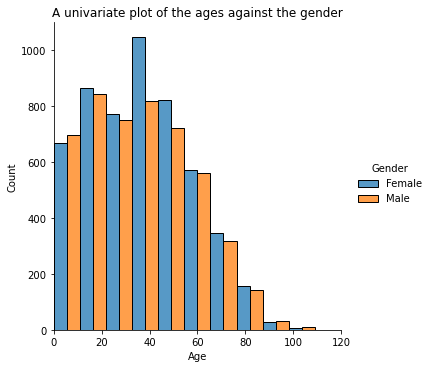

In [98]:
%matplotlib inline 
a_plot = sns.displot(df, x = df["Age"], hue = df["Gender"], bins = 10, multiple = 'dodge').set(title='A univariate plot of the ages against the gender')
a_plot.set(xlim = (0, 120))

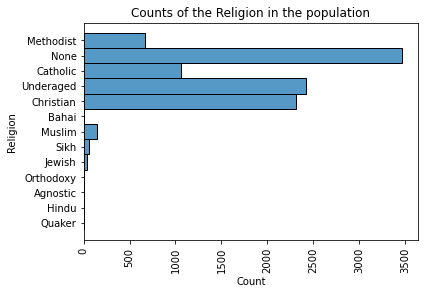

In [99]:
sns.histplot(data = df , y = df["Religion"]).set(title='Counts of the Religion in the population')
plt.xticks(rotation = 90)
plt.show()

In [100]:
status = df[df["Marital Status"] != "Minors"] #This segments the marital status into segments excluding the minors

[Text(0.5, 1.0, 'Marital Status excluding Minors')]

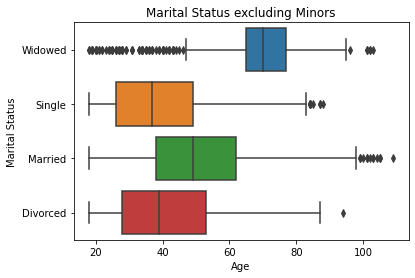

In [101]:
sns.boxplot(data = status, x = status["Age"], y = status["Marital Status"]).set(title='Marital Status excluding Minors')
#box_plt1.set(xlim = (0, 120))


[Text(0.5, 1.0, 'Marital Status excluding Minors conditioned by Gender')]

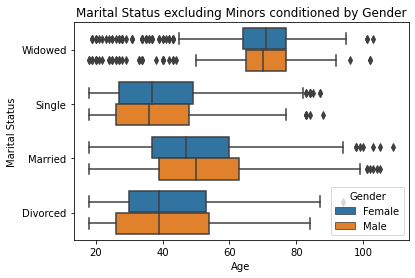

In [102]:
sns.boxplot(data = status, x = status["Age"], y = status["Marital Status"], hue = status["Gender"]).set(title='Marital Status excluding Minors conditioned by Gender')


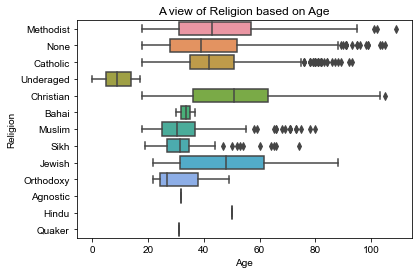

In [103]:
sns.boxplot(data = df, x = df["Age"], y = df["Religion"]).set(title='A view of Religion based on Age')
sns.set(rc={'figure.figsize':(12,10)})

# Data Analysis

In [104]:
df.groupby(["Marital Status", "Gender"]).mean()["Age"] #returns mean of the gender grouped by the marital status

Marital Status  Gender
Divorced        Female    42.366920
                Male      41.489583
Married         Female    49.404255
                Male      51.362561
Minors          Female     9.192982
                Male       8.945082
Single          Female    38.611853
                Male      37.613095
Widowed         Female    64.834783
                Male      64.923529
Name: Age, dtype: float64

In [105]:
new_Df = df.groupby(["Marital Status", "Gender"]).size().reset_index(name = "Count")
new_Df
#Tells us the amount of people within each marital status conditioned by the gender

,Marital Status,Gender,Count
0,Divorced,Female,526
1,Divorced,Male,384
2,Married,Female,1457
3,Married,Male,1437
4,Minors,Female,1197
5,Minors,Male,1220
6,Single,Female,1873
7,Single,Male,1680
8,Widowed,Female,230
9,Widowed,Male,170


In [106]:
df["Marital Status"].unique()

array(['Widowed', 'Single', 'Married', 'Minors', 'Divorced'], dtype=object)

In [107]:
single_group = df[df["Marital Status"]=="Single"].describe()["Age"] #a statistic of Single people in the population

In [108]:
married_group = df[df["Marital Status"]=="Married"].describe()['Age'] #a statistic of Married people in the population

In [109]:
divorced_group = df[df["Marital Status"]=="Divorced"].describe()['Age'] #a statistic of Divorced people in the population

In [110]:
widowed_group = df[df["Marital Status"]=="Widowed"].describe()['Age'] #a statistic of Widowed people in the population

In [111]:
# outputs from individual statistic is converted to a dataframe
Count_Bar = pd.DataFrame({"Marital Status" :["Single", "Married", "Divorced", "Widowed"],
                         "count":[3554,2893,910,400],
                         "mean":[38.15,50.36,41.99,64.87],
                         "std":[18.21,16.77,17.05,19.06],
                         "min":[18,18,18,18],
                         '25%':[26,38,28,65],
                         '50%':[37,49,39,70],
                         '75%':[49,62,53,77],
                         "max":[88,109,94,103]})
Count_Bar

,Marital Status,count,mean,std,min,25%,50%,75%,max
0,Single,3554,38.15,18.21,18,26,37,49,88
1,Married,2893,50.36,16.77,18,38,49,62,109
2,Divorced,910,41.99,17.05,18,28,39,53,94
3,Widowed,400,64.87,19.06,18,65,70,77,103


### Unemployment

In [112]:
unemployed = df[df["Occupation"]=="Unemployed"] #segregates unemployed people in our occupation column
unemployed.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
21,8,Pendragon Street,Hannah,Lawrence,45,Head,Single,Female,Unemployed,None,None
29,2,Woodward Street,Ashley,Jones,66,Head,Divorced,Male,Unemployed,None,Christian
39,6,Woodward Street,Dorothy,Dodd,51,Head,Divorced,Female,Unemployed,None,Christian
51,8,Woodward Street,Alex,Thornton-Miller,24,Son,Divorced,Male,Unemployed,None,Methodist
120,28,Woodward Street,Annette,Reynolds,33,Head,Divorced,Female,Unemployed,None,Catholic


Text(0.5, 0, 'unemployed age count')

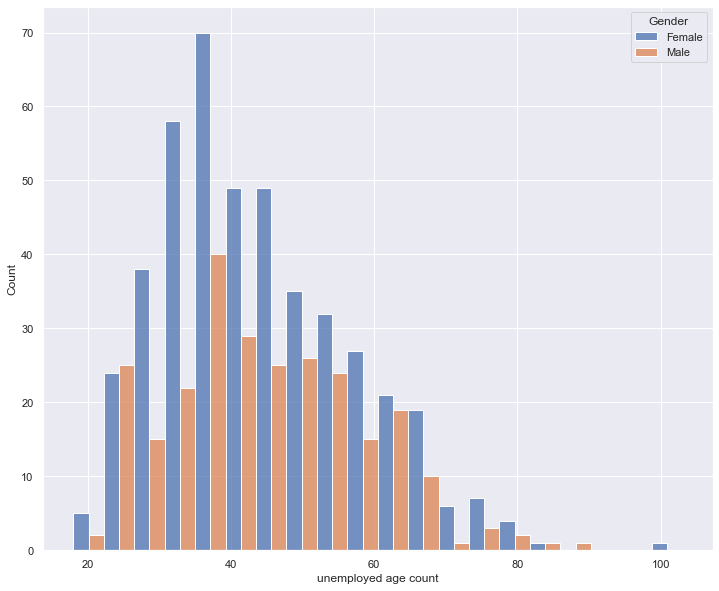

In [113]:
#Histplot showing unempolyment conditioned by gender
employment = sns.histplot(data = unemployed, x ="Age", bins = 20, hue = "Gender", multiple = 'dodge' )
employment.set_xlabel("unemployed age count")

In [114]:
df["Employment_bar"] = df["Occupation"].apply(lambda x: x.split(" ")[0]) 
#Creates a new column splitting the Occupation and returning the first index after being splitted. aids our occupation

In [115]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment_bar
0,1,Pendragon Street,Sian,Smith,72,Head,Widowed,Female,Retired Media buyer,None,Methodist,Retired
1,2,Pendragon Street,Claire,Thomson,23,Head,Single,Female,Secretary/administrator,None,Methodist,Secretary/administrator
2,2,Pendragon Street,Nathan,McLean,25,None,Single,Male,Drilling engineer,None,None,Drilling
3,3,Pendragon Street,Donna,Taylor,44,Head,Married,Female,Careers adviser,None,Catholic,Careers
4,3,Pendragon Street,Bernard,Taylor,47,Husband,Married,Male,Radiation protection practitioner,None,Catholic,Radiation


In [116]:
def Occupation_Gene(x):
    if x == "Unemployed":
        return "Unemployed"
    elif x == "Student":
        return "Student"
    elif x == "Child":
        return "Child"
    elif x == "University":
        return "University Student"
    elif x == "PhD":
        return "Phd Student"
    elif x == "Retired":
        return "Retired"
    else:
        return "Employed"
#This function splits the employment_bar created into fewer distinct groups for easy understanding

In [117]:
df["Occupation_Bar"] = df["Employment_bar"].apply(lambda x : Occupation_Gene(x))
#function is applied

In [118]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment_bar,Occupation_Bar
0,1,Pendragon Street,Sian,Smith,72,Head,Widowed,Female,Retired Media buyer,None,Methodist,Retired,Retired
1,2,Pendragon Street,Claire,Thomson,23,Head,Single,Female,Secretary/administrator,None,Methodist,Secretary/administrator,Employed
2,2,Pendragon Street,Nathan,McLean,25,None,Single,Male,Drilling engineer,None,None,Drilling,Employed
3,3,Pendragon Street,Donna,Taylor,44,Head,Married,Female,Careers adviser,None,Catholic,Careers,Employed
4,3,Pendragon Street,Bernard,Taylor,47,Husband,Married,Male,Radiation protection practitioner,None,Catholic,Radiation,Employed


In [119]:
df[(df["Occupation_Bar"]=="Child") & (df["Age"]>7)] # our function affects some values titled "Child" which has to be corrected

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment_bar,Occupation_Bar
1016,13,Stoke Avenue,Laura,Day,41,None,Single,Female,Child psychotherapist,None,None,Child,Child
1264,99,Bangor Street,Terence,Adams,41,Head,Divorced,Male,Child psychotherapist,None,Catholic,Child,Child
1757,5,Davies Trace,Kathleen,Porter,39,Head,Single,Female,Child psychotherapist,None,Christian,Child,Child
2413,14,Fish Locks,Karl,O'Sullivan,53,Head,Single,Male,Child psychotherapist,None,Muslim,Child,Child
2504,49,Fish Locks,Jill,Davey,63,Head,Single,Female,Child psychotherapist,None,Christian,Child,Child
3425,24,Leisuretun Road,Neil,Barnes,25,Son,Single,Male,Child psychotherapist,None,None,Child,Child
5523,59,Guinevere Plains,Rosie,Thomas,46,Head,Married,Female,Child psychotherapist,None,None,Child,Child
5555,74,Guinevere Plains,Chelsea,Spencer,33,Head,Married,Female,Child psychotherapist,None,Methodist,Child,Child
8247,142,Shah Freeway,Ian,Morgan,28,Son,Single,Male,Child psychotherapist,None,None,Child,Child


In [120]:
df.loc[[1016,1264,1757,2413,2504,3425,5523,5555,8247], "Occupation_Bar"] = "Employed"

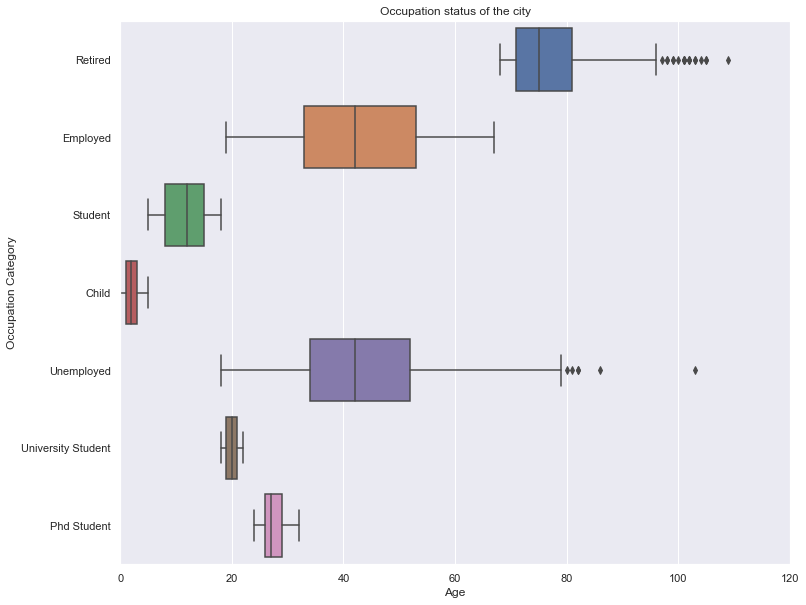

In [121]:
box_plt1 = sns.boxplot(data = df, x = df["Age"], y = df["Occupation_Bar"])
box_plt1.set(xlim = (0, 120))
box_plt1.set(title = 'Occupation status of the city')
box_plt1.set_ylabel("Occupation Category")
sns.set(rc={'figure.figsize':(10,15)})
#Box plot showing the Occupation Bar across ages

In [122]:
df.groupby(["Occupation_Bar"]).count()["Age"]

Occupation_Bar
Child                  565
Employed              5431
Phd Student             15
Retired                856
Student               1983
Unemployed             706
University Student     618
Name: Age, dtype: int64

In [123]:
del df["Employment_bar"] #Delete Employment_bar as its not needed for further analysis

## AGE pyramid

In [124]:
def Age_Gene(x):  #A function to group our population into age bandwidths of 5
    if x >= 100:
        return "100 and Above"
    elif x > 94 and x < 100:
        return "95-99"
    elif x > 89 and x < 95:
        return "90-94"
    elif x > 84 and x < 90:
        return "85-89"
    elif x > 79 and x < 85:
        return "80-84"
    elif x > 74 and x < 80:
        return "75-79"
    elif x > 69 and x < 75:
        return "70-74"
    elif x > 64 and x < 70:
        return "65-69"
    elif x > 59 and x < 65:
        return "60-64"
    elif x > 54 and x < 60:
        return "55-59"
    elif x > 49 and x < 55:
        return "50-54"
    elif x > 44 and x < 50:
        return "45-49"
    elif x > 39 and x < 45:
        return "40-44"
    elif x > 34 and x < 40:
        return '35-39'
    elif x > 29 and x < 35:
        return "30-34"
    elif x > 24 and x < 30:
        return "25-29"
    elif x > 19 and x < 25:
        return "20-24"
    elif x > 14 and x < 20:
        return "15-19"
    elif x > 9 and x <15 :
        return "10-14"
    elif x > 4 and x < 10:
        return "5-9"
    elif x >= 0 and x < 5:
        return "0-4"
    

In [125]:
df["Age_column"] = df["Age"].apply(lambda x : Age_Gene(x))


In [126]:
df.groupby(['Age_column', 'Gender']).size() #returns the size conditioned by gender and age group

Age_column     Gender
0-4            Female    263
               Male      301
10-14          Female    364
               Male      361
100 and Above  Female      7
               Male        8
15-19          Female    388
               Male      389
20-24          Female    400
               Male      373
25-29          Female    329
               Male      326
30-34          Female    413
               Male      324
35-39          Female    501
               Male      398
40-44          Female    439
               Male      391
45-49          Female    402
               Male      331
5-9            Female    340
               Male      328
50-54          Female    335
               Male      308
55-59          Female    292
               Male      284
60-64          Female    251
               Male      242
65-69          Female    163
               Male      177
70-74          Female    160
               Male      146
75-79          Female    105
               Male  

In [127]:
#creating a dataframe from the previous entries
new_DF = pd.DataFrame({"Age": ['0-4',"5-9",'10-14',"15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99","100+"],
                      "male" :[-301,-328,-360,-389,-373,-326,-324,-398,-391,-331,-308,-284,-242,-177,-146,-76,-77,-31,-13,-7,-8],
                      "female" : [263,340,364,387,400,330,413,501,439,402,335,292,251,163,160,105,83,35,9,4,7]})
Age_Class = ['100+',"95-99","90-94","85-89",'80-84',"75-79","70-74","65-69","60-64","55-59","50-54","45-49","40-44","35-39","30-34","25-29","20-24","15-19",'10-14',"5-9","0-4"] 


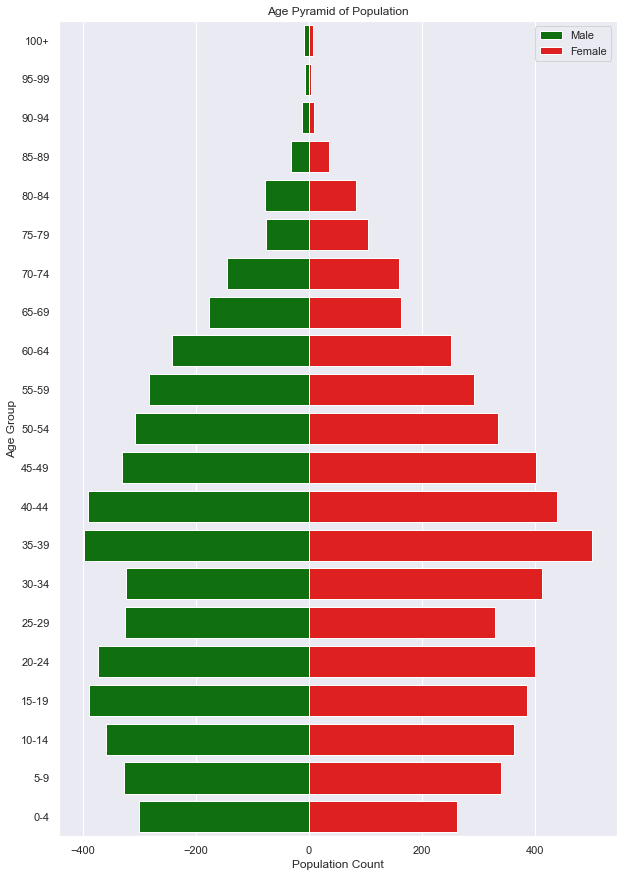

In [128]:
age_pyramid = sns.barplot(x='male', y='Age', data=new_DF, order=Age_Class, color=('green'), label='Male') 
 
age_pyramid = sns.barplot(x='female', y='Age', data=new_DF, order=Age_Class, color=('red'), label='Female') 
 
age_pyramid.legend() 
plt.title('Age Pyramid of Population') 
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
sns.set(rc={'figure.figsize':(15,14)})

[Text(0.5, 1.0, 'Age Pyramid based on Gender')]

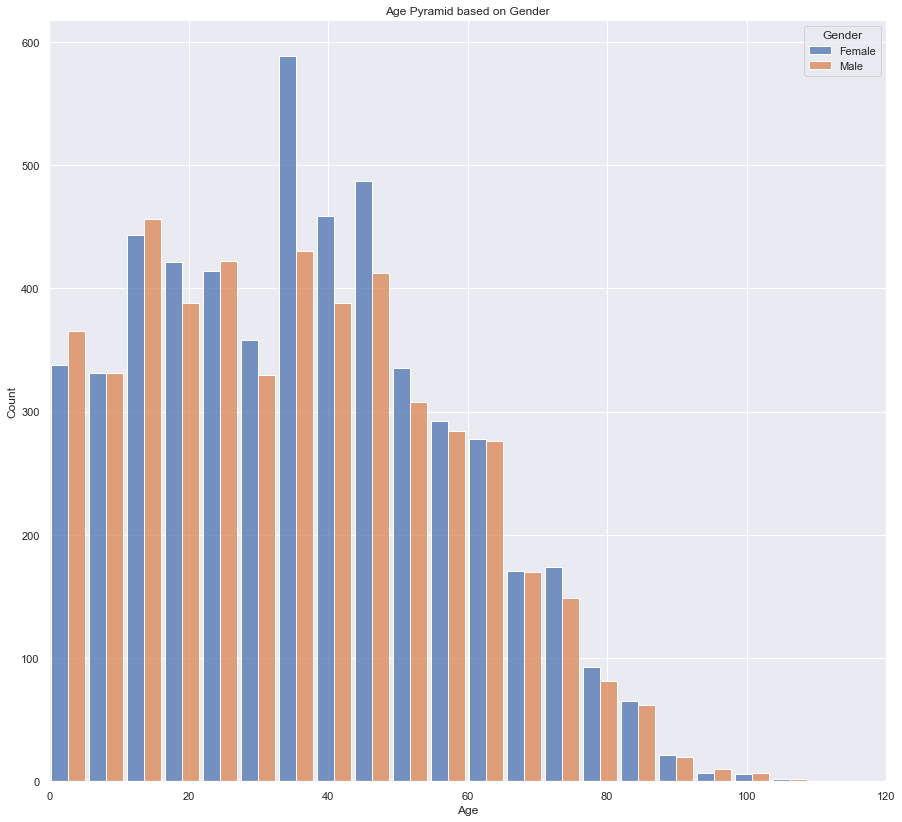

In [129]:
#histogram showing the age conditoned by the gender
histogram = sns.histplot(data = df, x = df["Age"], hue = df["Gender"], multiple = 'dodge', shrink = .90, bins = 20)
histogram.set(xlim = (0, 120))
histogram.set(title = 'Age Pyramid based on Gender')

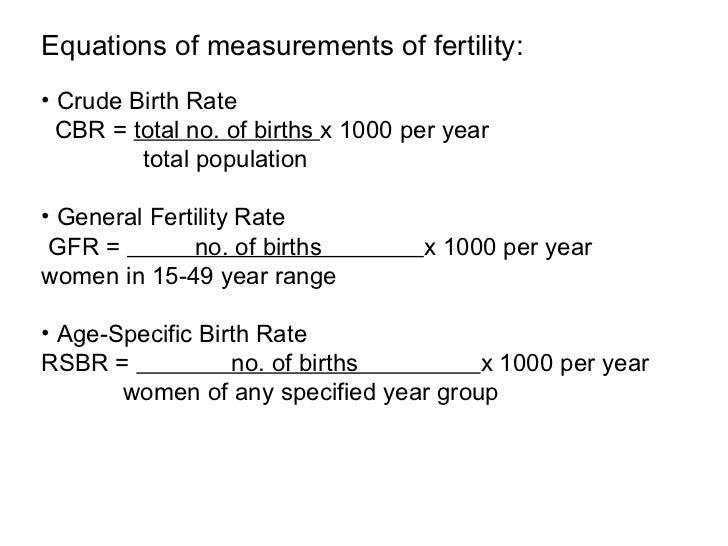

### CBR
The crude birth rate is the annual number of live births per 1,000 population.

##### Method of measurement
The crude birth rate is generally computed as a ratio. The numerator is the number of live births observed in a population during a reference period and the denominator is the number of person-years lived by the population during the same period. It is expressed as births per 1,000 population

In [130]:
babies_at_zero = len(df[df["Age"]==0])
babies_at_four = len(df[df["Age"]==4])
babies_at_eight = len(df[df["Age"]==8])

In [131]:
print(babies_at_zero)

106


In [132]:
population = len(df)

In [133]:
print(population)

10174


In [134]:
cbr = (babies_at_zero/population)*1000

In [135]:
print(cbr)

10.41871436996265


In [136]:
cbr_5yearsago = (babies_at_four/population)*1000
print(cbr_5yearsago)

13.07253784155691


# ASFR
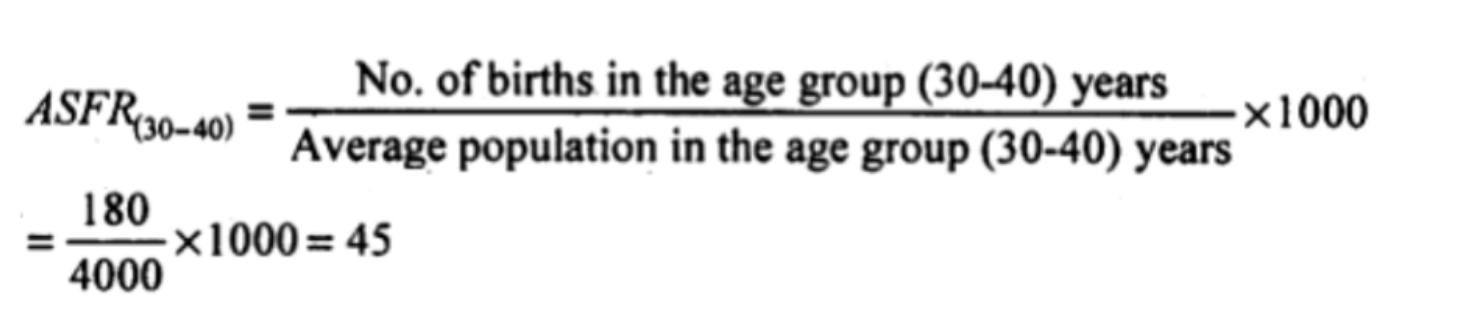

In [137]:
births2529 = len(df[df['Age'] == 0])
births3034 = len(df[df['Age'] == 4])
births3540 = len(df[df['Age'] == 8])
age2529 = df[df['Age'].between(25,29) & (df['Gender'] == 'Female')]
age3034 = df[df['Age'].between(30,34) & (df['Gender'] == 'Female')]
age3540 = df[df['Age'].between(35,40) & (df['Gender'] == 'Female')]
agelen2529 = len(age2529)
agelen3034 = len(age3034)
agelen3540 = len(age3540)

print((births2529/agelen2529)*1000)
print ("30-34", (births3034/agelen3034)*1000)
print ("35-40", (births3034/agelen3540)*1000)

322.18844984802433
30-34 322.03389830508473
35-40 226.96245733788396


In [138]:
print(agelen2529)

329


# GFR
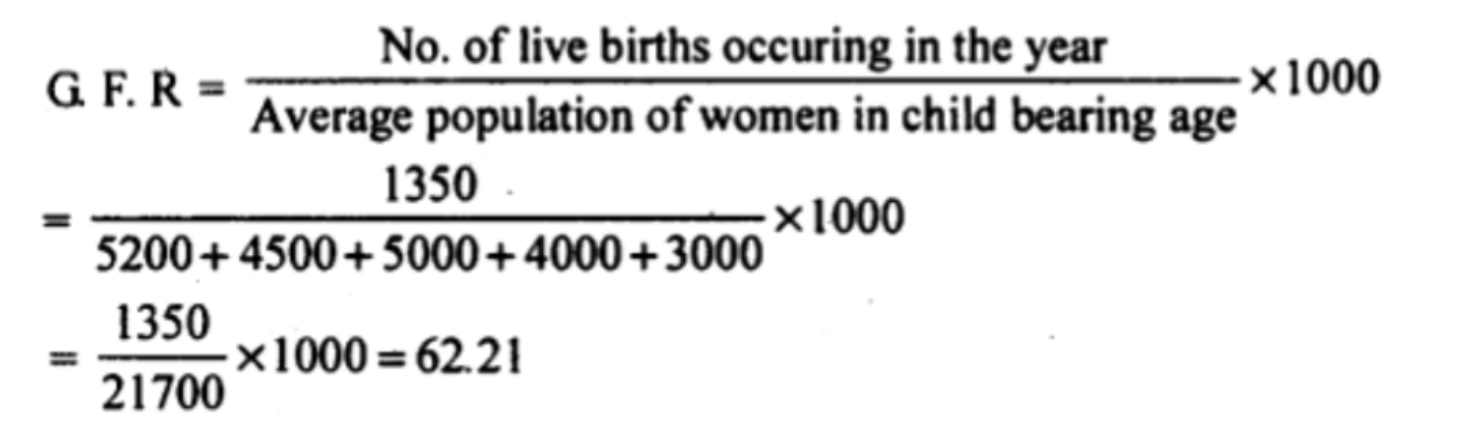

In [139]:
total_births = babies_at_zero + babies_at_four + babies_at_eight #As previously defined

In [140]:
fertility_age = len(age2529) + len(age3034) + len(age3540)

In [141]:
gfr = total_births/fertility_age * 1000

In [142]:
print(gfr)

285.39156626506025


# CDR
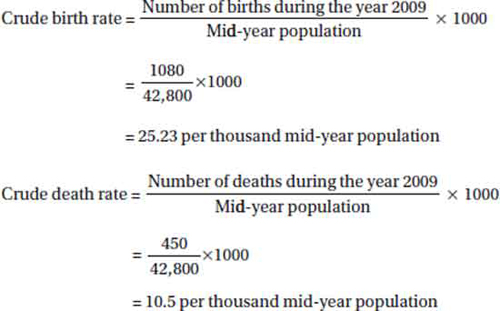

In [143]:
old_people = df[df['Age'].between(65,99)].groupby('Age').size().sort_index(ascending=False)


In [144]:
estimated_old_age = old_people.shift(-1)


In [145]:
# calculate the difference between our two sets

death_estimate = old_people - estimated_old_age

# change it to a dataframe...

dying_population = death_estimate.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

deaths = dying_population[dying_population['Count'] < 0]
deaths

,Age,Count
3,96,-4.0
5,94,-2.0
7,92,-3.0
8,91,-2.0
10,89,-13.0
12,87,-6.0
14,85,-10.0
15,84,-9.0
16,83,-1.0
18,81,-6.0


In [146]:
deathrate = abs(((deaths['Count']).sum())/population)*1000
deathrate

13.662276390800079

In [147]:
#process is repeated across our age groups from column "Age_column"
age_group = df.groupby('Age_column').size().sort_index(ascending=False)
age_group

Age_column
95-99             11
90-94             22
85-89             66
80-84            160
75-79            181
70-74            306
65-69            340
60-64            493
55-59            576
50-54            643
5-9              668
45-49            733
40-44            830
35-39            899
30-34            737
25-29            655
20-24            773
15-19            777
100 and Above     15
10-14            725
0-4              564
dtype: int64

In [148]:
age_group2 = age_group.shift(-1)
age_group2

Age_column
95-99             22.0
90-94             66.0
85-89            160.0
80-84            181.0
75-79            306.0
70-74            340.0
65-69            493.0
60-64            576.0
55-59            643.0
50-54            668.0
5-9              733.0
45-49            830.0
40-44            899.0
35-39            737.0
30-34            655.0
25-29            773.0
20-24            777.0
15-19             15.0
100 and Above    725.0
10-14            564.0
0-4                NaN
dtype: float64

In [149]:
death_across_age_groups =  age_group - age_group2
death_across_age_groups

Age_column
95-99            -11.0
90-94            -44.0
85-89            -94.0
80-84            -21.0
75-79           -125.0
70-74            -34.0
65-69           -153.0
60-64            -83.0
55-59            -67.0
50-54            -25.0
5-9              -65.0
45-49            -97.0
40-44            -69.0
35-39            162.0
30-34             82.0
25-29           -118.0
20-24             -4.0
15-19            762.0
100 and Above   -710.0
10-14            161.0
0-4                NaN
dtype: float64

In [150]:
due_difference = death_across_age_groups.reset_index(name='Count')
due_difference

,Age_column,Count
0,95-99,-11.0
1,90-94,-44.0
2,85-89,-94.0
3,80-84,-21.0
4,75-79,-125.0
5,70-74,-34.0
6,65-69,-153.0
7,60-64,-83.0
8,55-59,-67.0
9,50-54,-25.0


In [151]:
deaths_over = due_difference[due_difference['Count'] < 0]
deaths_over

,Age_column,Count
0,95-99,-11.0
1,90-94,-44.0
2,85-89,-94.0
3,80-84,-21.0
4,75-79,-125.0
5,70-74,-34.0
6,65-69,-153.0
7,60-64,-83.0
8,55-59,-67.0
9,50-54,-25.0


## Crude Growth Rate
this is just a deviation of the crude death rate from the birth rate.

i.e Crude Birth Rate - Crude Dirth Rate

In [152]:
cbr - deathrate

-3.2435620208374285

In [153]:
print("Crude growth rate: ", (cbr - deathrate)/10)

Crude growth rate:  -0.32435620208374283


### Unemployment and Training
The unemployment rate was evaluated here, 
Workers between the age of 16-65(Labor Force)/Unemployed between 
the work force divided by population multiply by a thousand

In [154]:
Workers = df [df["Age"].between(16,65)]
unemployed = df[ (df["Age"].between(16,65)) & (df["Occupation_Bar"]=="Unemployed")]
working_population = len(Workers)
unemployed_population = len(unemployed)
unemployment_rate = unemployed_population/working_population
print(unemployment_rate*100)

9.323843416370106


### Immigration
An estimate of the single lodgers in the town per thousand

In [155]:
immigration = df[(df["Relationship to Head of House"] == "Lodger") & (df["Marital Status"]=="Single")]

In [156]:
immigration_length = len(immigration)

In [157]:
crude_IR = (immigration_length / population)*1000

In [158]:
print(crude_IR)

26.734814232356985


### Emmigration
An Estimate of the Divorced female minus the divorced males in the town per a thousand

In [159]:
Female_Divorced = df[(df["Gender"] == "Female") & (df["Marital Status"]=="Divorced")]

In [160]:
Male_Divorced = df[(df["Gender"] == "Male") & (df["Marital Status"]=="Divorced")]

In [161]:
emmigrants = len(Female_Divorced) - len(Male_Divorced)

In [162]:
emmigration_rate = (emmigrants/population)*1000

In [163]:
print(f"Emmigration per 1000: {emmigration_rate}")

Emmigration per 1000: 13.957145665421663


### Crude Population Growth
This is a difference between the amount of people coming into the town (by birth or immigration) and

amount of people leaving(By death or emigration)

In [164]:
cpg = round((cbr + crude_IR ) - (deathrate + emmigration_rate))
print(f"crude population growth: {cpg}") # more immigrants who are not reproducing

crude population growth: 10


## Commuters

These are the amount of road users in the town. Estimated by their sum per total population multipled by 1000

In [165]:
commuters = len(df[df["Occupation"].isin(['Drilling engineer',
       'Engineer, drilling', 'Airline pilot', 'Geochemist',
       'Tax inspector', 'Government social research officer', 'Hospital doctor',
       'Transport planner', 'Pilot, airline','University Student',
       'Psychologist, clinical','Paramedic', 'Race relations officer',
       'Occupational hygienist',
       'Scientific laboratory technician', 'Minerals surveyor',
       'Biomedical engineer', 'Engineer',
       "Nurse, children's", 'Chief Operating Officer',
       'Physicist, medical', 'Prison officer', 
       'Neurosurgeon','Lecturer, further education',
       'Merchant navy officer','Water engineer', 'Operations geologist',
       'Land/geomatics surveyor','Further education lecturer',
       'Clinical scientist, histocompatibility and immunogenetics',
       'Psychiatric nurse','Hydrologist',
       'Analytical chemist',
       'Operational investment banker', 'Warden/ranger',
       'Pension scheme manager', 'Health promotion specialist',
       'Hydrogeologist', 'Air traffic controller', 'Lobbyist',
       'Air broker', 'Armed forces technical officer',
       'Oceanographer',
       'Archaeologist', 
        'Pharmacist, hospital',
       'Associate Professor', 
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Cabin crew',
       'Lecturer, higher education',
       'International aid/development worker', 'Tourist information centre manager',
       'PhD Student',
       'Professor Emeritus',
       'Nature conservation officer',
       'Actor', 'Research officer, government','Geoscientist', 'Teacher, music',
       'Mental health nurse', 'Ophthalmologist', 'Doctor, hospital',
       'Research scientist (life sciences)','Embryologist, clinical',
       'Air cabin crew',
       'Herpetologist', 'Health physicist',
       'Human resources officer','Surgeon','Nurse, mental health',
       'Civil engineer, contracting','Geologist, engineering',
       'Surveyor, land/geomatics', 'Immunologist', 
       'Medical laboratory scientific officer', 
       'Cytogeneticist','Scientist, marine', 
       'Higher education lecturer',
       'Geographical information systems officer',
       'Clinical embryologist', 'Marine scientist',
       'Engineer, aeronautical','Meteorologist'])])



In [166]:
print(commuters)

1321


In [167]:
total_commuters = (commuters/population)*1000
total_commuters

129.84077059170434

### Occupancy Rate

In [168]:
df2 = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy_Bar') 
#groupby House number and street column, size and convert to a dataframe


In [169]:
df2.groupby("Occupancy_Bar").count() #gives us a rough count of the occupancy per house number and street

,House Number,Street
Occupancy_Bar,,
1,943,943
2,991,991
3,578,578
4,570,570
5,403,403
6,85,85
7,23,23
8,10,10
9,9,9


In [170]:
df2["Occupancy_Bar"].mode() #Highest appearing frequency

0    2
dtype: int64

In [171]:
occupancy_rate = df2["Occupancy_Bar"]

In [172]:
occupancy_rate.agg([np.mean,np.median,np.var,np.std]) #returns the mean,median,variance and standard deviation

mean      2.791987
median    2.000000
var       3.107419
std       1.762787
Name: Occupancy_Bar, dtype: float64

[Text(0.5, 1.0, 'Representation of Occupants')]

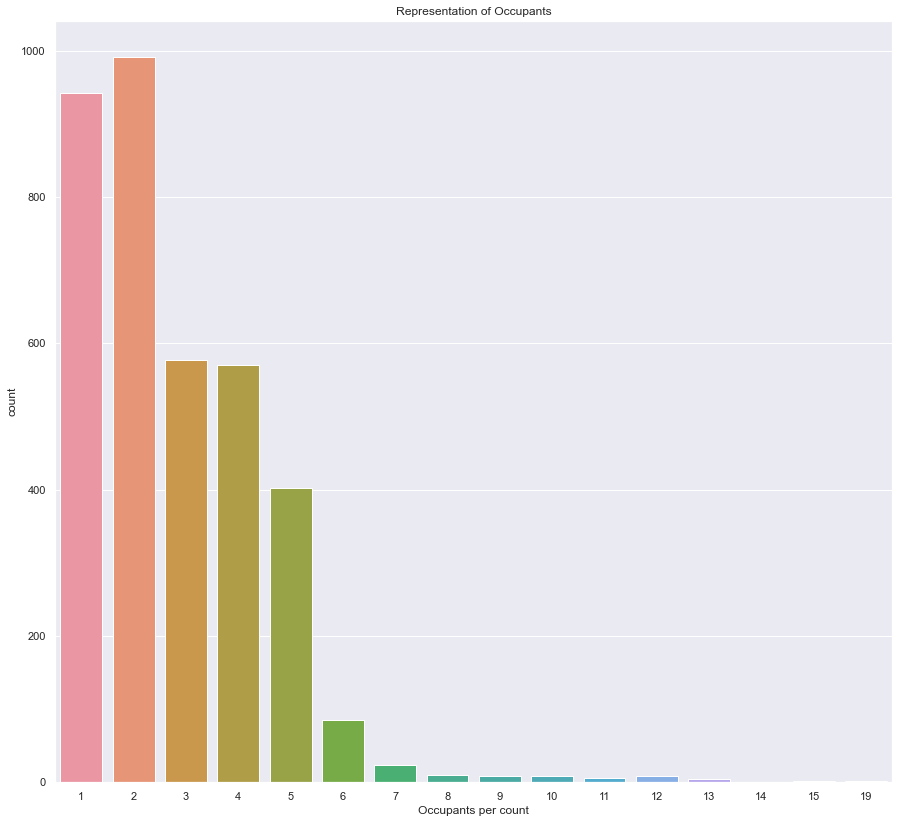

In [173]:
occupants = sns.countplot(data = df2, x = "Occupancy_Bar" ) #graph showing the occupancy rate per count
occupants.set_xlabel("Occupants per count")
occupants.set(title = "Representation of Occupants")

In [174]:
df2 = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')

In [175]:
df2.columns

Index(['House Number', 'Street', 'Occupancy Count'], dtype='object')

In [176]:
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Occupation_Bar', 'Age_column'],
      dtype='object')

In [177]:
df3 = pd.merge(df,df2)#merges the dataframe containing occupancy count number to our original data frame

In [178]:
df3.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Occupation_Bar', 'Age_column',
       'Occupancy Count'],
      dtype='object')

In [179]:
df3.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Bar,Age_column,Occupancy Count
0,1,Pendragon Street,Sian,Smith,72,Head,Widowed,Female,Retired Media buyer,None,Methodist,Retired,70-74,1
1,2,Pendragon Street,Claire,Thomson,23,Head,Single,Female,Secretary/administrator,None,Methodist,Employed,20-24,2
2,2,Pendragon Street,Nathan,McLean,25,None,Single,Male,Drilling engineer,None,None,Employed,25-29,2
3,3,Pendragon Street,Donna,Taylor,44,Head,Married,Female,Careers adviser,None,Catholic,Employed,40-44,4
4,3,Pendragon Street,Bernard,Taylor,47,Husband,Married,Male,Radiation protection practitioner,None,Catholic,Employed,45-49,4


In [180]:
!pip install scipy 
#install scipy library

In [181]:
from scipy.stats import mode

In [182]:
grouped_df3 = df3.groupby("Occupancy Count")

In [183]:
df3.groupby("Occupancy Count")["Age"].apply(lambda x: mode(x)[0][0]).reset_index() #returns the modal age in each occupancy count

,Occupancy Count,Age
0,1,72
1,2,31
2,3,37
3,4,39
4,5,8
5,6,20
6,7,7
7,8,13
8,9,20
9,10,5


In [184]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10174 entries, 0 to 10173
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10174 non-null  int32 
 1   Street                         10174 non-null  object
 2   First Name                     10174 non-null  object
 3   Surname                        10174 non-null  object
 4   Age                            10174 non-null  int32 
 5   Relationship to Head of House  10174 non-null  object
 6   Marital Status                 10174 non-null  object
 7   Gender                         10174 non-null  object
 8   Occupation                     10174 non-null  object
 9   Infirmity                      10174 non-null  object
 10  Religion                       10174 non-null  object
 11  Occupation_Bar                 10174 non-null  object
 12  Age_column                     10174 non-null  object
 13  O

In [185]:
pf.ProfileReport(df).to_file("census__cleaned.html") #creates a profile report of my cleaned data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]